<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/S4_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECD - Introdução à Visualização de Dados - Semana 4
## Exercícios 
### Estatística Descritiva, Matriz de Correlação e Exploração de Dados usando Gráficos
##### Prof. Dr. Alessandro de Lima Bicho

## Olá, pessoal!

Em 15 de abril de 1912, o maior navio de passageiros já construído colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, ele matou 1502 dos 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional, e levou a melhores regulamentos de segurança para os navios. Uma das razões pelas quais o naufrágio resultou em tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros.

O dataset titanic.csv contém dados de 887 passageiros reais do Titanic. Cada linha representa uma pessoa. As colunas descrevem diferentes atributos sobre a pessoa, incluindo:
- Survived (sobreviveu): se sobreviveu ao naufrágio estará com 1, e 0 (zero) se não sobreviveu;
- Pclass: tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;
- Name: nome do passageiro(a);
- Sex: gênero do passageiro, sendo masculino e feminino;
- Age: idade do passageiro na data da ocorrência do naufrágio;
- Siblings/Spouses Aboard: número de irmãos/cônjuges a bordo;
- Parents/Children Aboard: número de pais/filhos a bordo;
- Fare: valor da passagem.	

Nesta tarefa, temos duas questões que procurarão fundamentar estatiscamente suas conclusões sobre os sobreviventes deste naufrágio.

Bons estudos! 

Abraço, Alessandro.

Aqui nós importamos o dataset, que está disponível no meu Google Drive. Caso queiram, podem fazer o download do dataset através do link informado na função `read_csv()` (para análise no Microsoft Excel, por exemplo). 

In [2]:
#importar a biblioteca pandas
import pandas as pd
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("https://drive.google.com/uc?export=view&id=1Ad2NNAqsCDGwl125D7z-nSbPLVpCFlYu", error_bad_lines=False, encoding = "ISO-8859-1", sep = ",")
df

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.00,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.00,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.00,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.00,0,0,30.00


1) Ao rever os dados de 887 passageiros do naufrágio do Titanic, você, cientista de dados, percebe que pode haver uma **correlação** que explique os sobreviventes deste naufrágio! Demonstre, através dos ensinamentos das Semanas 3 e 4, como estatísticamente podemos fundamentar nossa resposta. Explore os possíveis métodos.

Começamos pelas correlações entre os diversos gupos de sobreviventes.

In [3]:
# Responda aqui a questão 1
#
df.corr()

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
Survived,1.00,-0.34,-0.06,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.39,0.09,0.02,-0.55
Age,-0.06,-0.39,1.00,-0.30,-0.19,0.11
Siblings_Spouses_Aboard,-0.04,0.09,-0.30,1.00,0.41,0.16
Parents_Children_Aboard,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.11,0.16,0.22,1.00


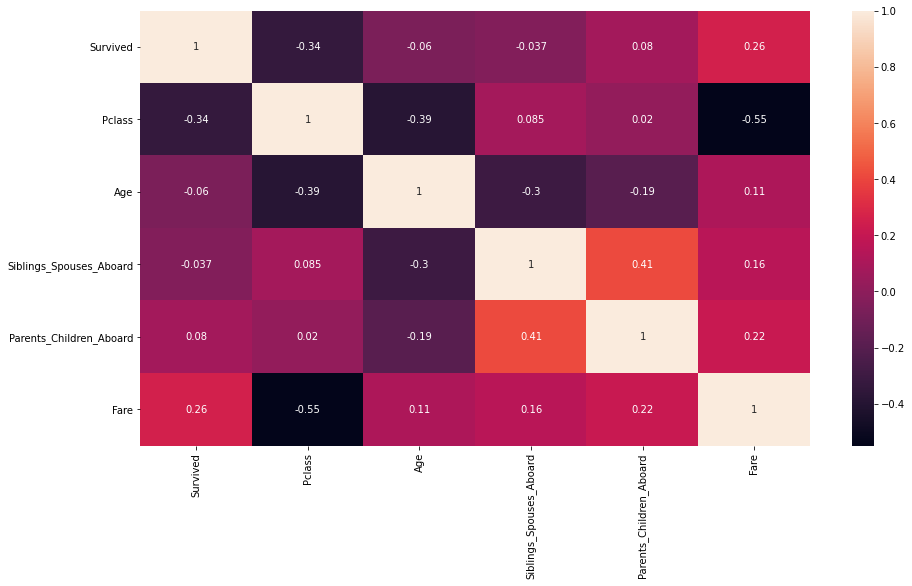

In [4]:
#Outra visualização
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [5]:
df.describe()

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
count,887.00,887.00,887.00,887.00,887.00,887.00
mean,0.39,2.31,29.47,0.53,0.38,32.31
std,0.49,0.84,14.12,1.10,0.81,49.78
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.25,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.14
max,1.00,3.00,80.00,8.00,6.00,512.33


Como se pode ver, apenas 39% das pessoas sobreviveram. A maioria viajava na 2a ou 3a  Classes (a média de Pclass é 2,31). A média de idade era de 29,47 anos. O mais novo tinha  pouco mais de 5 meses e o mais velho 80 anos.

In [6]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
Sex,,,,,,
female,0.74,2.16,27.72,0.69,0.65,44.48
male,0.19,2.39,30.43,0.43,0.24,25.63


Depreende-se do quadro acima, que 74% das mulheres sobreviveram contra apenas 19% dos homens.

In [7]:
df.groupby('Pclass').mean()

,Survived,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
Pclass,,,,,
1,0.63,38.79,0.42,0.36,84.15
2,0.47,29.87,0.40,0.38,20.66
3,0.24,25.19,0.62,0.40,13.71


63 % das pessoas que sobreviveram eram da 1a Classe. 47% pertenciam à 2a Classe e apenas 24% eram da 3a Classe.

In [ ]:
df[df['Age']<=12].value_counts().sort_index().sum()

79

In [8]:
df[df['Age']<18].value_counts().sort_index().sum()

130

In [9]:
df[df['Age']<=12].mean()

Survived                   0.54
Pclass                     2.68
Age                        4.94
Siblings_Spouses_Aboard    2.04
Parents_Children_Aboard    1.39
Fare                      31.56
dtype: float64

In [10]:
df[df['Age']>12].mean()

Survived                   0.37
Pclass                     2.27
Age                       31.87
Siblings_Spouses_Aboard    0.38
Parents_Children_Aboard    0.28
Fare                      32.38
dtype: float64

In [11]:
df[df['Age']<18].mean()

Survived                   0.50
Pclass                     2.64
Age                        9.20
Siblings_Spouses_Aboard    1.65
Parents_Children_Aboard    1.05
Fare                      31.06
dtype: float64

Vê-se pelos quadros acima, que as crianças tiveram maior chance de sobreviver (54% contra 37% dos que tinham mais de 12 anos)



ECA - Artigo 2º
Considera-se criança, para os efeitos desta Lei, a pessoa até doze anos de idade incompletos, e adolescente aquela entre doze e dezoito anos de idade.

Por volta de 00:20, 40 minutos após a colisão, o carregamento dos botes salva-vidas estava em andamento. O Segundo Oficial Lightoller recordou posteriormente que ele notou Smith de pé perto da ponte, olhando para o oceano como que em um transe. De acordo com Lightoller, "Gritei com toda força: 'Não é melhor colocar as mulheres e as crianças dentro dos botes, senhor?' Ele me ouviu e acenou com a resposta."[92] Smith então ordenou para Lightoller e Murdoch para "colocar as mulheres e as crianças dentro e abaixar".[93] Lightoller tomou conta dos botes no lado estibordo e Murdoch se encarregou dos botes à estibordo. Os dois oficiais interpretaram as ordem de evacuação de "mulheres e crianças" de maneiras diferentes; Murdoch interpretou a ordem como sendo **mulheres e crianças primeiro**, enquanto Lightoller entendeu como sendo **apenas mulheres e crianças**.
* Retirado de Wikipedia.


Pelo acima descrito, constata-se que mulheres e crianças tiveram maior chance de sobreviver e restou demonstrado no texto acima o  principal motivo da sua maior sobrevivência.
. Destaque-se também, que as pessoas em classe mais elevada tiveram maior chance de sobrevivência.

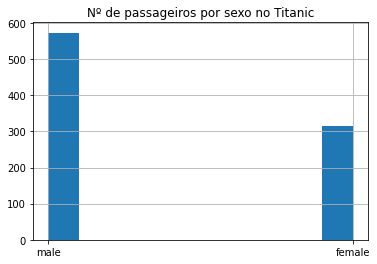

In [14]:
#Responda aqui a questão 2
plt.title('Nº de passageiros por sexo no Titanic')
df["Sex"].hist()

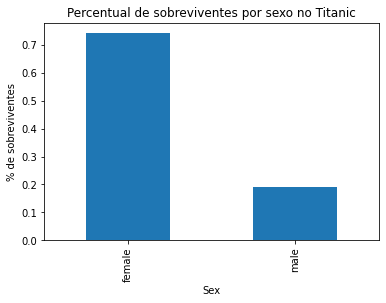

In [15]:
plt.title('Percentual de sobreviventes por sexo no Titanic')
plt.ylabel('% de sobreviventes')
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

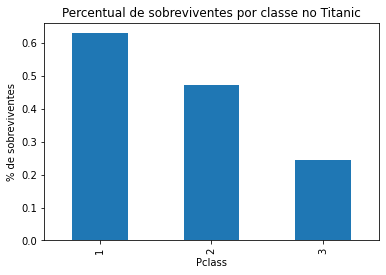

In [21]:
plt.title('Percentual de sobreviventes por classe no Titanic')
plt.ylabel('% de sobreviventes')
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')